In [1]:
import cv2
import sys, os
import numpy as np
import torch
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict
from segment_anything import SamPredictor, sam_model_registry
from typing import List, Tuple
from custom_utils import load_images_and_boxes, plot_masks_on_images, save_masks, resize_images_and_masks

In [2]:
# 이미지와 레이블 경로
image_folder = 'data/images/'
label_folder = 'data/labels/'
mask_output_folder = 'data/masks/'  # 마스크를 저장할 폴더 경로

sam_model_type = "vit_l"
sam_ckpt = 'weights/sam_l.pt'
device = "cuda" if torch.cuda.is_available() else "cpu"
# cfg = dict(conf=0.75, task="segment", model='weights/sam_l.pt', imgsz = 512,
#                  project="./attempt")
# print(cfg)

In [7]:
sam = sam_model_registry[sam_model_type](checkpoint=sam_ckpt).to(device=device)
mask_predictor = SamPredictor(sam)


score for mask 1: 0.87


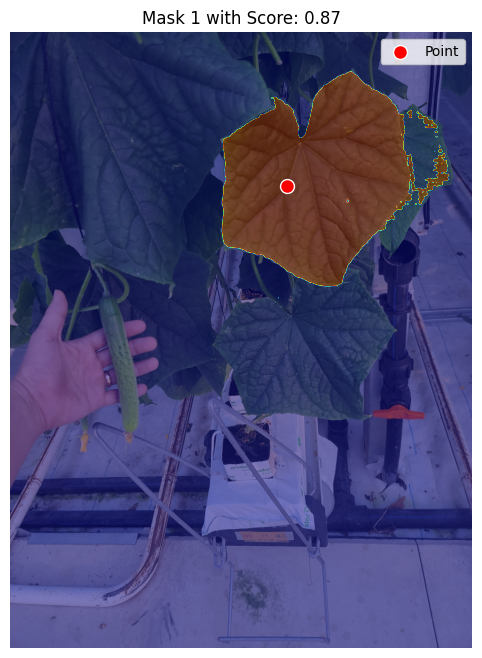

score for mask 2: 0.56


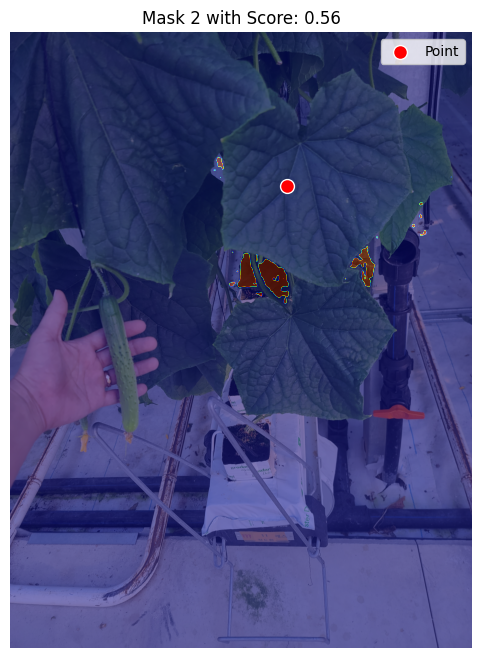

score for mask 3: 0.95


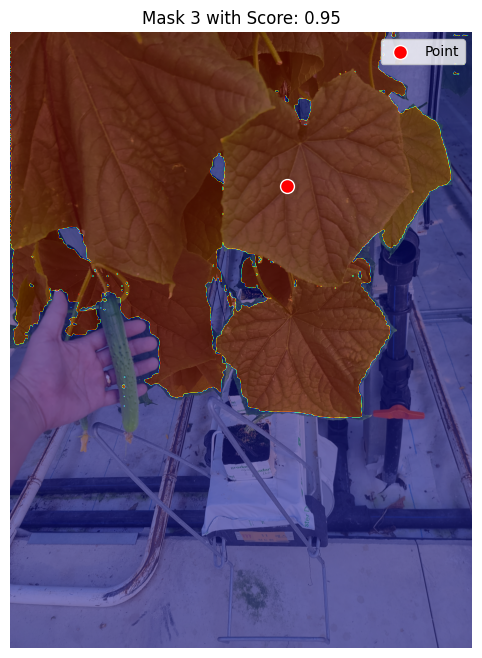

In [17]:
# 이미지 로드 및 RGB 변환
image_path = '/home/oi/Desktop/song/cucumber-image/data/images/V003_3_3_1_2_4_2_2_1_0_0_20221019_5319_20240422195059.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 포인트 좌표 설정 (차원 맞춤)
point_coords = torch.tensor([[[1800, 1000]]], dtype=torch.float, device='cuda')  # 디바이스에 맞게 할당
point_labels = torch.tensor([[1]], dtype=torch.int, device='cuda')  # 라벨도 텐서로 변환

# SAM 모델을 통한 마스크 예측
mask_predictor.set_image(image_rgb)
masks, scores, _ = mask_predictor.predict_torch(
    boxes=None,
    multimask_output=True,
    point_coords=point_coords,
    point_labels=point_labels
)

# 결과 시각화 (모든 마스크 출력)
for i in range(masks.shape[0]):  # 객체 개수만큼 반복
    object_masks = masks[i]  # 현재 객체의 마스크들
    object_scores = scores[i]  # 현재 객체의 점수들

    # 3개의 마스크에 대해 차례로 출력
    for j in range(object_masks.shape[0]):
        print(f'score for mask {j+1}: {object_scores[j]:.2f}')

        # 현재 마스크 추출
        current_mask = object_masks[j].cpu().numpy().astype(np.uint8) * 255

        # 시각화
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)  # 원본 이미지 표시
        plt.imshow(current_mask, alpha=0.5, cmap='jet')  # 마스크를 반투명하게 오버레이

        # 포인트 좌표 시각화 (차원 맞춰서 좌표 추출)
        plt.scatter(point_coords[0, 0, 0].cpu().numpy(), point_coords[0, 0, 1].cpu().numpy(), 
                    color='red', s=100, edgecolor='white', label='Point')  # 포인트 표시

        plt.title(f"Mask {j+1} with Score: {object_scores[j]:.2f}")
        plt.axis('off')
        plt.legend()
        plt.show()

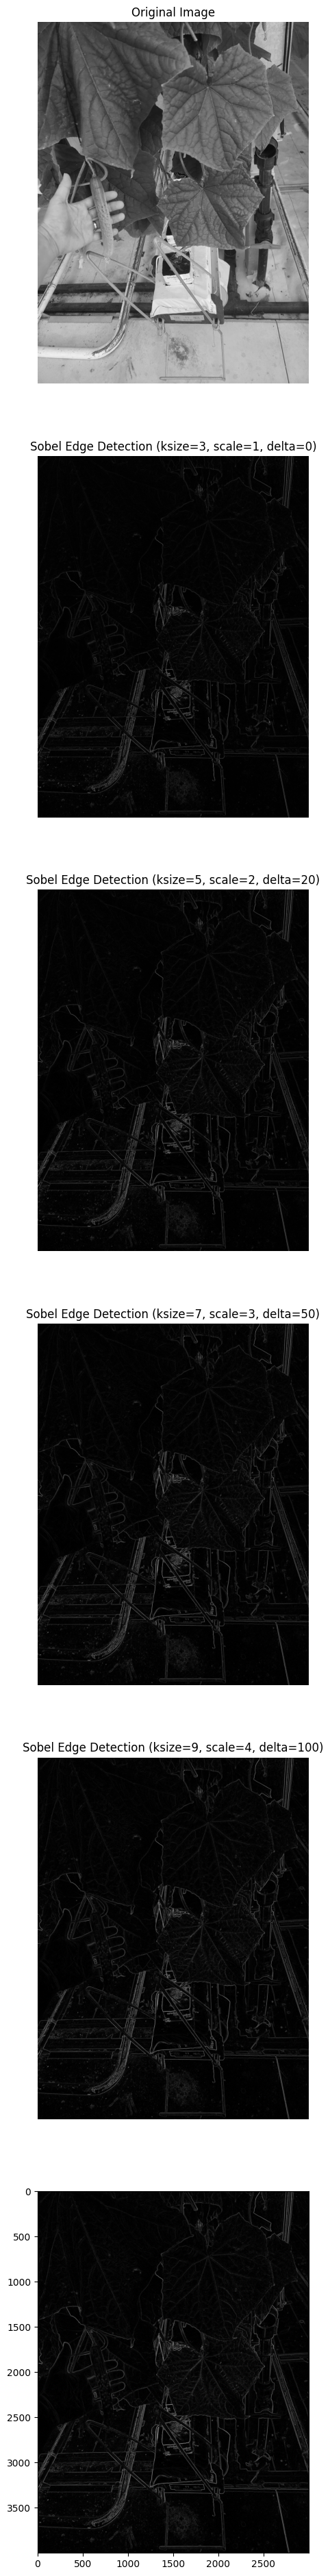

In [23]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 (경로는 직접 설정하세요)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 흑백으로 로드

# Sobel Filter 적용 - 파라미터 1: ksize=3, scale=1, delta=0
sobel_x1 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3, scale=1, delta=0)
sobel_y1 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3, scale=1, delta=0)
sobel_combined1 = cv2.magnitude(sobel_x1, sobel_y1)

# Sobel Filter 적용 - 파라미터 2: ksize=5, scale=2, delta=20
sobel_x2 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5, scale=2, delta=20)
sobel_y2 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5, scale=2, delta=20)
sobel_combined2 = cv2.magnitude(sobel_x2, sobel_y2)

# Sobel Filter 적용 - 파라미터 3: ksize=7, scale=3, delta=50
sobel_x3 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=7, scale=3, delta=50)
sobel_y3 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=7, scale=3, delta=50)
sobel_combined3 = cv2.magnitude(sobel_x3, sobel_y3)

# Sobel Filter 적용 - 파라미터 4: ksize=9, scale=4, delta=100 (더 강력하게)
sobel_x4 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=9, scale=4, delta=100)
sobel_y4 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=9, scale=4, delta=100)
sobel_combined4 = cv2.magnitude(sobel_x4, sobel_y4)

# Sobel Filter 적용 - 파라미터 5: ksize=11, scale=5, delta=150 (가장 강력하게)
sobel_x5 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=11, scale=5, delta=150)
sobel_y5 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=11, scale=5, delta=150)
sobel_combined5 = cv2.magnitude(sobel_x5, sobel_y5)

# 시각화
plt.figure(figsize=(24, 48))  # figsize를 조정하여 이미지 크기를 키움

# 원본 이미지
plt.subplot(6, 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Sobel Filter 결과 - 파라미터 1
plt.subplot(6, 1, 2)
plt.imshow(sobel_combined1, cmap='gray')
plt.title("Sobel Edge Detection (ksize=3, scale=1, delta=0)")
plt.axis('off')

# Sobel Filter 결과 - 파라미터 2
plt.subplot(6, 1, 3)
plt.imshow(sobel_combined2, cmap='gray')
plt.title("Sobel Edge Detection (ksize=5, scale=2, delta=20)")
plt.axis('off')

# Sobel Filter 결과 - 파라미터 3
plt.subplot(6, 1, 4)
plt.imshow(sobel_combined3, cmap='gray')
plt.title("Sobel Edge Detection (ksize=7, scale=3, delta=50)")
plt.axis('off')

# Sobel Filter 결과 - 파라미터 4
plt.subplot(6, 1, 5)
plt.imshow(sobel_combined4, cmap='gray')
plt.title("Sobel Edge Detection (ksize=9, scale=4, delta=100)")
plt.axis('off')

# Sobel Filter 결과 - 파라미터 5
plt.subplot(6, 1, 6)
plt.imshow(sobel_combined5, cmap='gray')
